In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
# 讀取資料
df1 = pd.read_csv('L12_Train.csv')
df2 = pd.read_csv('L12_Train_2.csv')
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)

Shape of df1: (82911, 8)
Shape of df2: (13872, 8)


In [5]:
# 合併處理
df = pd.concat([df1, df2], ignore_index=True)
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,12,2024-03-01 15:41:28.000,0.00,1015.84,17.73,71.18,2766.25,1.62
1,12,2024-03-01 15:42:22.000,0.17,1015.84,17.74,71.54,2728.33,1.60
2,12,2024-03-01 15:43:22.000,0.00,1015.79,17.71,70.92,2749.17,1.58
3,12,2024-03-01 15:44:22.000,0.00,1015.78,17.67,71.39,2519.17,1.38
4,12,2024-03-01 15:45:22.000,0.17,1015.78,17.63,71.30,2294.17,1.31
...,...,...,...,...,...,...,...,...
96778,12,2024-10-18 14:35:07.000,0.00,1008.19,38.75,100.00,13224.17,177.22
96779,12,2024-10-18 14:36:07.000,0.00,1008.23,38.45,100.00,10944.17,175.31
96780,12,2024-10-18 14:37:07.000,0.00,1008.27,37.95,100.00,10320.00,174.70
96781,12,2024-10-18 14:38:07.000,0.00,1008.28,37.75,100.00,10195.83,175.45


In [6]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,96783.0,96783.000000,96783.000000,96783.000000,96783.000000,96783.000000,96783.000000
mean,12.0,0.050211,1009.541291,29.465242,84.239840,11176.245041,149.004334
std,0.0,0.208484,4.677424,8.419295,20.733871,19186.869354,407.926553
min,12.0,0.000000,999.260000,14.170000,16.880000,20.000000,0.000000
25%,12.0,0.000000,1006.280000,24.010000,71.290000,1740.000000,0.840000
50%,12.0,0.000000,1008.720000,28.130000,97.800000,4293.330000,5.620000
75%,12.0,0.000000,1012.195000,32.540000,100.000000,10572.915000,37.250000
max,12.0,5.490000,1024.840000,60.340000,100.000000,117758.200000,2230.580000


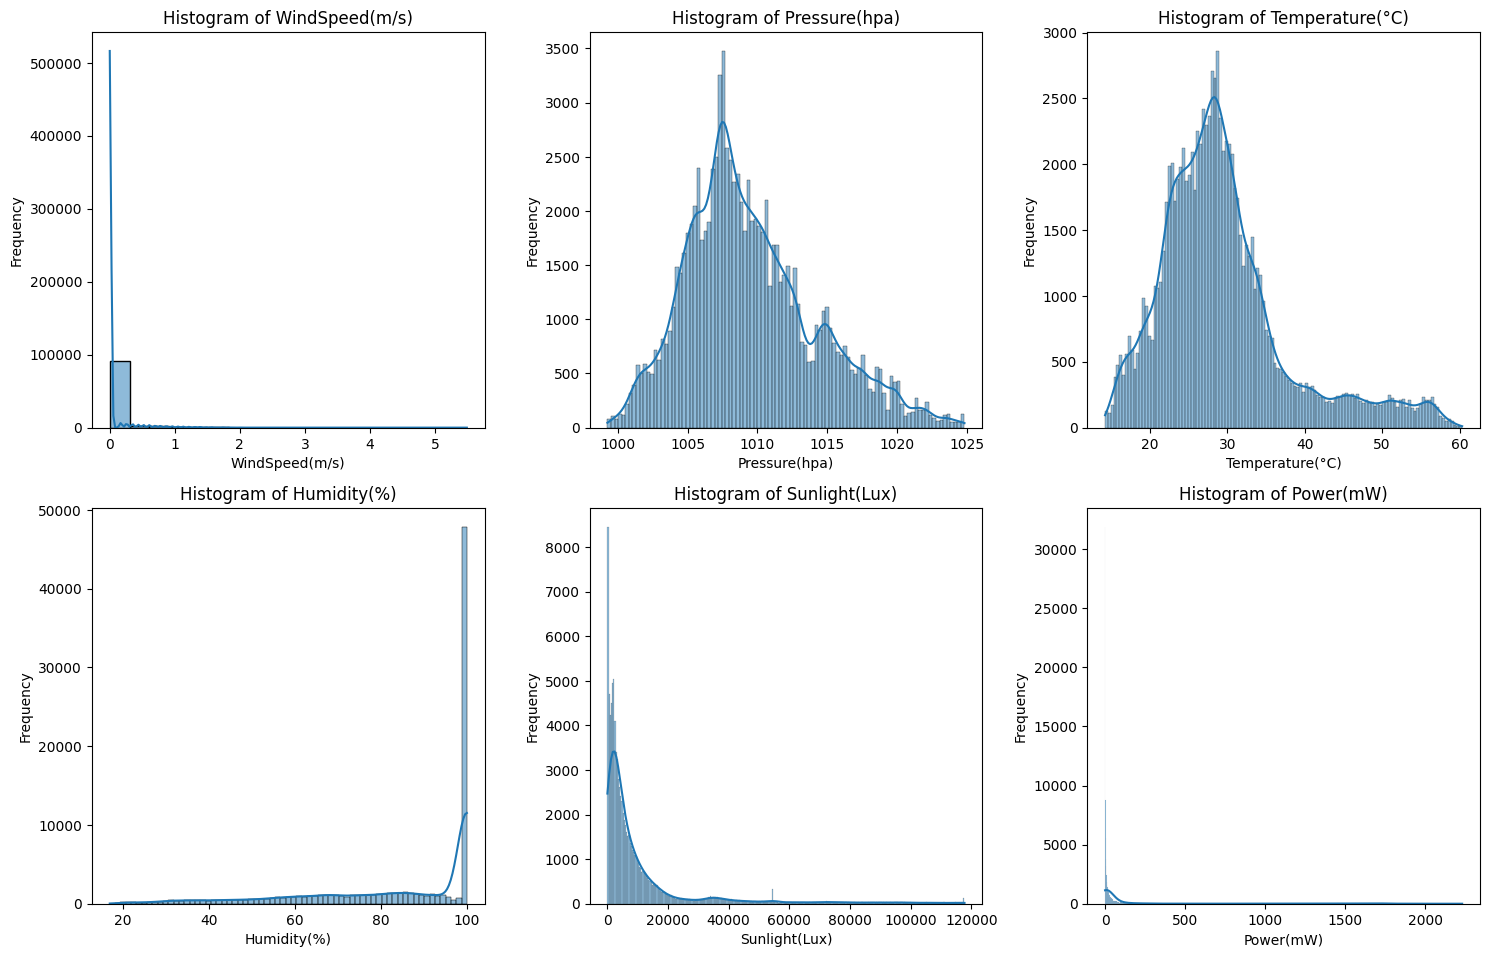

In [7]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [8]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
57783,12,2024-05-31 14:05:07.000,0.0,1005.89,52.63,41.06,117758.2,1878.40
57830,12,2024-05-31 14:52:07.000,0.0,1005.40,41.87,87.27,117758.2,2022.38
71747,12,2024-07-03 14:56:07.000,0.0,1008.99,56.18,38.46,117758.2,1682.14
71748,12,2024-07-03 14:57:07.000,0.0,1008.99,56.27,38.12,117758.2,1679.53
71749,12,2024-07-03 14:58:07.000,0.0,1008.94,56.10,38.13,117758.2,1682.60
...,...,...,...,...,...,...,...,...
82066,12,2024-07-17 14:38:07.000,0.0,1006.98,56.25,30.88,117758.2,1838.67
82079,12,2024-07-17 14:51:07.000,0.0,1006.79,56.30,31.77,117758.2,1773.00
82080,12,2024-07-17 14:52:07.000,0.0,1006.80,56.56,31.96,117758.2,1753.02
82085,12,2024-07-17 14:57:07.000,0.0,1006.84,57.38,31.05,117758.2,1726.07


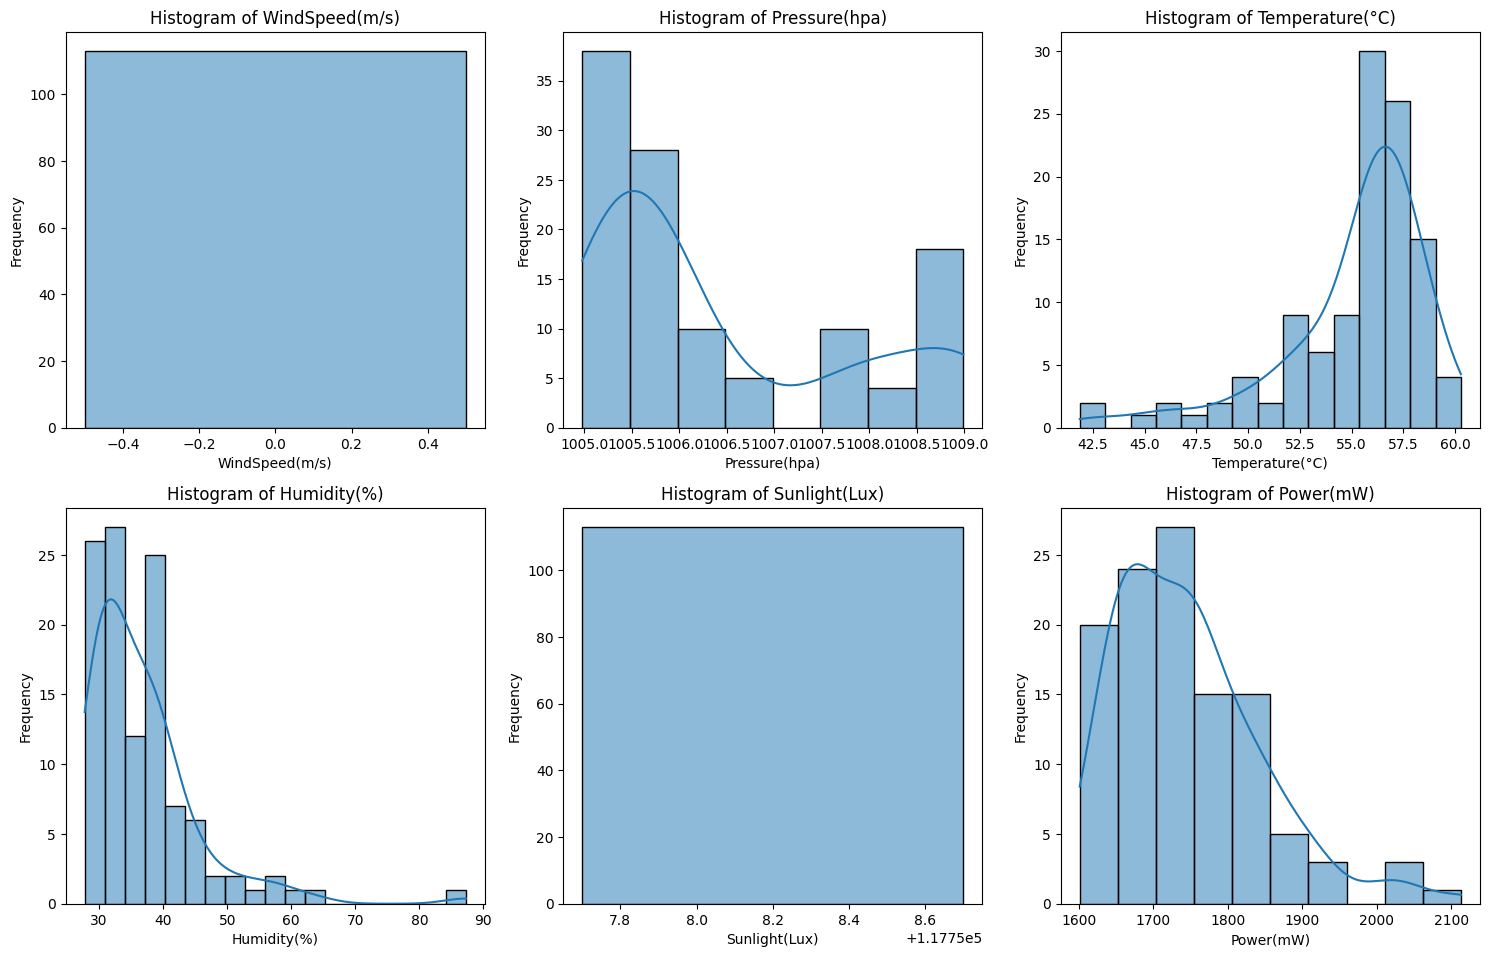

In [9]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [10]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0187 * Sunlight(Lux) + -59.5972


In [11]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope =  0.0187
intercept = -59.5972

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [12]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,96783.0,96783.000000,96783.000000,96783.000000,96783.000000,96783.000000,96783.000000
mean,12.0,0.050211,1009.541291,29.465242,84.239840,11151.573795,149.004334
std,0.0,0.208484,4.677424,8.419295,20.733871,19063.808153,407.926553
min,12.0,0.000000,999.260000,14.170000,16.880000,20.000000,0.000000
25%,12.0,0.000000,1006.280000,24.010000,71.290000,1740.000000,0.840000
50%,12.0,0.000000,1008.720000,28.130000,97.800000,4293.330000,5.620000
75%,12.0,0.000000,1012.195000,32.540000,100.000000,10572.915000,37.250000
max,12.0,5.490000,1024.840000,60.340000,100.000000,117751.010000,2230.580000


In [13]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [14]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240301154112,0.16,1015.80,17.67,71.09,2794.96,1.82
1,20240301155112,0.24,1015.85,17.69,72.57,2746.50,1.66
2,20240301160112,0.02,1015.96,17.27,75.65,2490.33,1.26
3,20240301161112,0.23,1016.00,16.98,77.04,2054.92,0.81
4,20240301162112,0.23,1016.15,16.65,79.09,1219.08,0.33
...,...,...,...,...,...,...,...
9674,20241018135712,0.00,1008.36,47.99,79.67,36802.42,207.86
9675,20241018140712,0.00,1008.22,44.80,91.16,23439.49,203.57
9676,20241018141712,0.00,1008.19,41.25,99.99,18467.00,209.30
9677,20241018142712,0.00,1008.20,39.09,100.00,17102.25,201.31


# HEATMAP

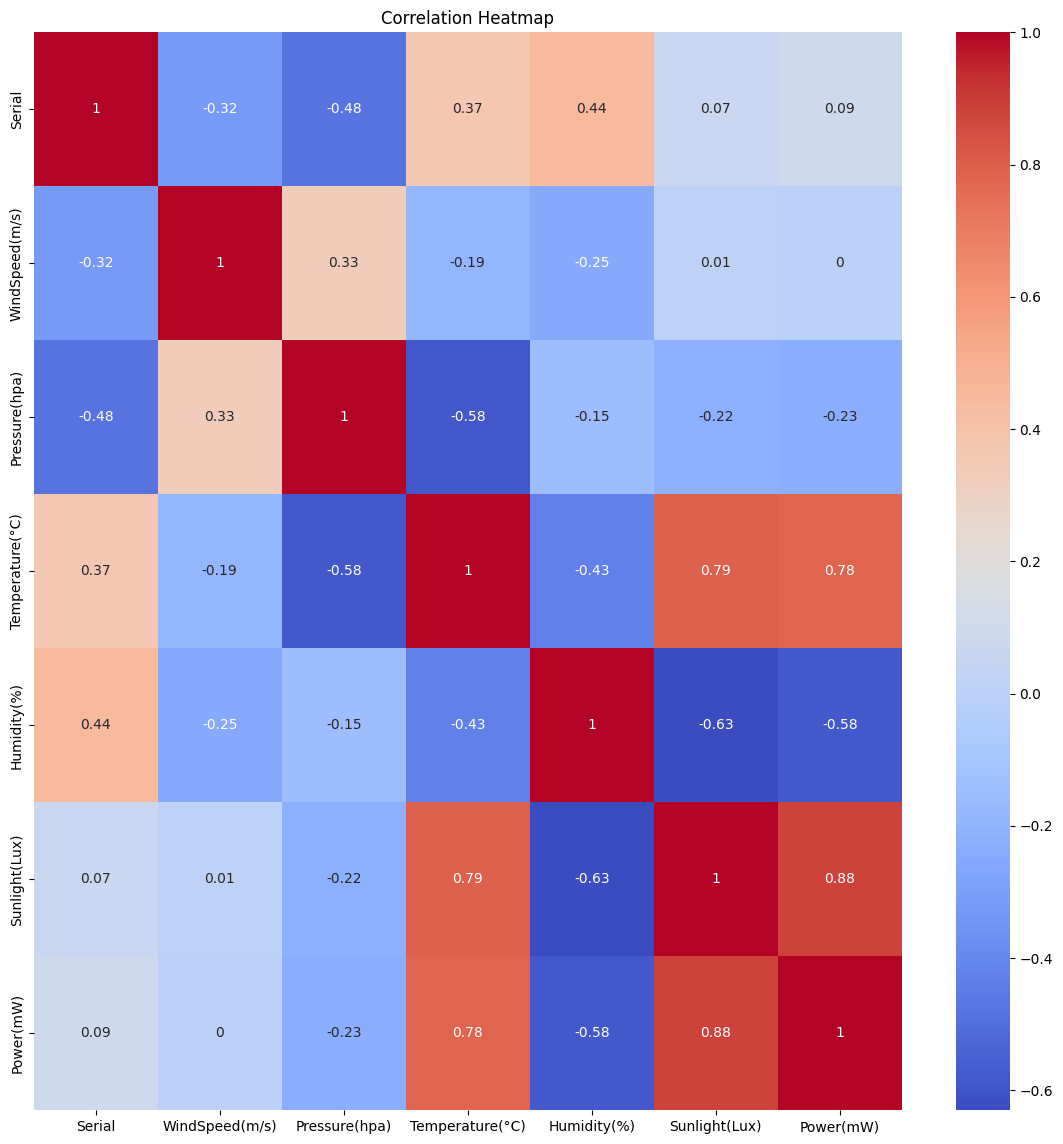

In [15]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.877880
Temperature(°C)    0.784909
Humidity(%)        0.576308
Pressure(hpa)      0.226895
Serial             0.089358
WindSpeed(m/s)     0.002410
Name: Power(mW), dtype: float64

In [17]:
df.to_csv('L12_Train_Revise.csv', index=False)